In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import *


from CustomAlgorithm import *

drive = "/run/media/mateusz/Seagate Expansion Drive/"

initted = False

if not initted:
    df = pd.read_csv("out.csv")
    df.sort_values(["count"], inplace=True, ascending=False)

    for index, row in df.iterrows():
        p = PurePath(row['file'])
        p = Path(*p.parts[5:])
        p = drive / p
        df.at[index, 'file'] = str(p)
    initted = True

In [2]:
df

,Unnamed: 0,file,start_frame,end_frame,box_up_left_x,box_up_left_y,box_down_right_x,box_down_right_y,length,count,section,line_fir
2,2,/run/media/mateusz/Seagate Expansion Drive/all...,23,58,1549,558,1691,592,144.810226,31,77,-0.997466
10,10,/run/media/mateusz/Seagate Expansion Drive/all...,28,42,1128,868,1166,970,108.503456,15,121,-0.997019
7,7,/run/media/mateusz/Seagate Expansion Drive/all...,28,40,907,937,941,1016,86.005814,13,135,-0.997526
8,8,/run/media/mateusz/Seagate Expansion Drive/all...,27,36,90,528,129,619,98.086693,10,64,-0.994990
0,0,/run/media/mateusz/Seagate Expansion Drive/all...,28,36,1804,542,1855,576,61.911228,9,79,-0.990011
5,5,/run/media/mateusz/Seagate Expansion Drive/all...,29,35,1460,64,1463,104,42.107006,7,12,0.974538
9,9,/run/media/mateusz/Seagate Expansion Drive/all...,7,15,1185,646,1198,666,21.954498,7,89,-0.856702
3,3,/run/media/mateusz/Seagate Expansion Drive/all...,29,34,868,47,882,106,60.638271,6,7,-0.995950
6,6,/run/media/mateusz/Seagate Expansion Drive/all...,27,32,1466,17,1496,74,64.884514,6,12,-0.996150
1,1,/run/media/mateusz/Seagate Expansion Drive/all...,29,33,539,978,540,1000,23.021729,5,132,0.859507


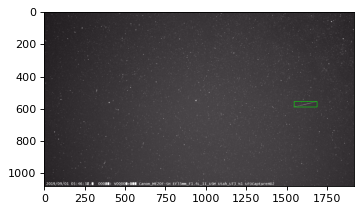

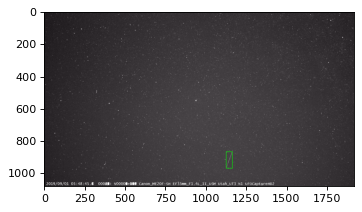

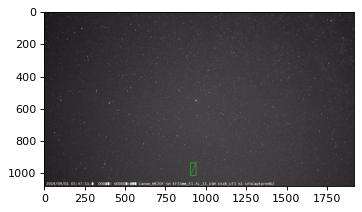

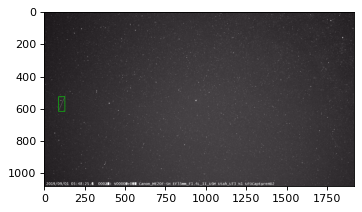

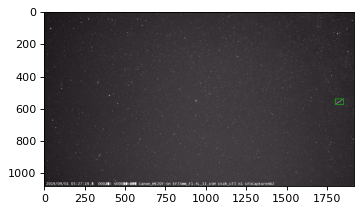

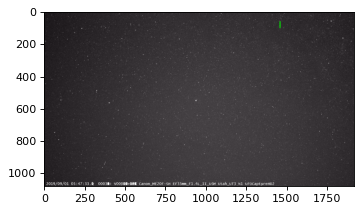

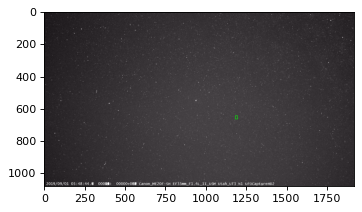

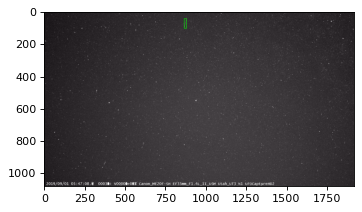

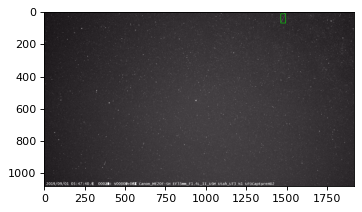

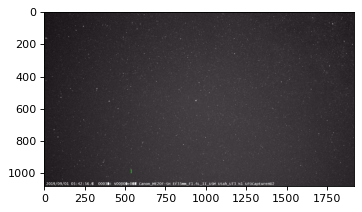

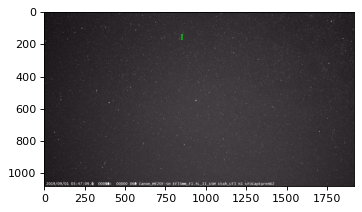

In [3]:
%matplotlib inline
from matplotlib.pyplot import figure

# figure(figsize=(20, 20), dpi=80)
# for row in range(len(df)):
#     show_trigger(TriggerInfo.from_csv_row(df.iloc[0]))
#     break

# plt.Figure(figsize=(20,20))

for idx, row in df.iterrows():
    # continue
    show_trigger(TriggerInfo.from_csv_row(row), size=(5,5))
    continue

959


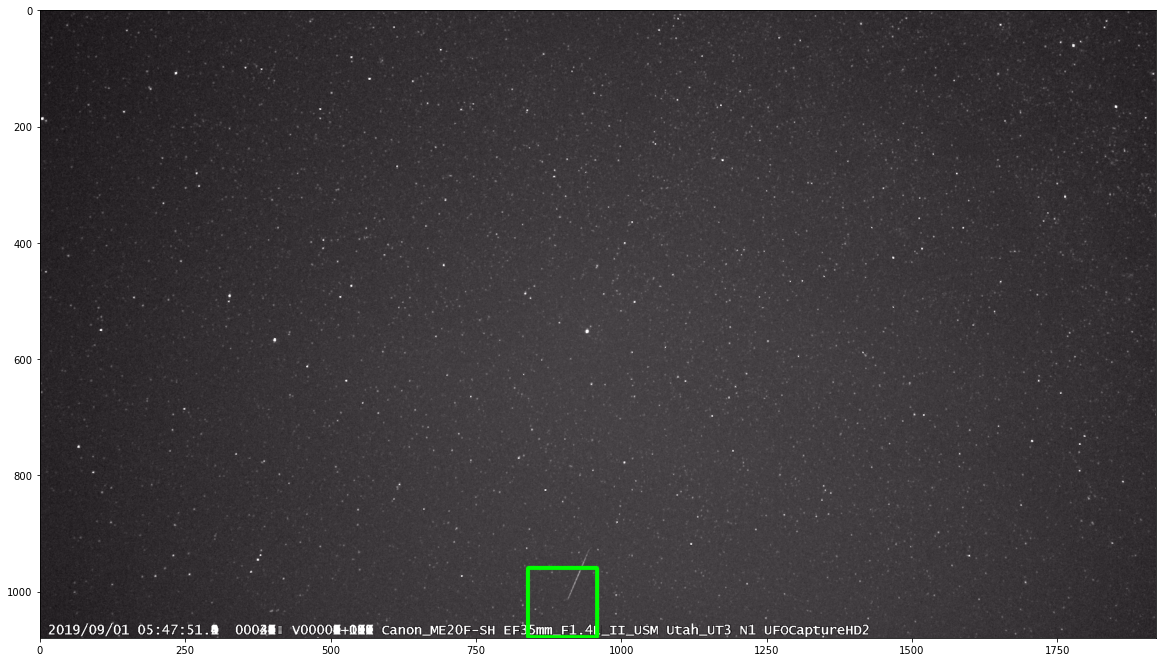

In [4]:
# %matplotlib

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

from IPython.core.display import HTML, display
# HTML('<a href="http://example.com">link</a>')

from CustomAlgorithm import *

trigger = TriggerInfo.from_csv_row(df.iloc[2])

section = trigger.get_section()
min_x = (((section % (1920 // 120))) * 120) - 1
min_y = (((section // (1920 // 120))) * 120) - 1
max_x = (min_x + 120) - 1
max_y = (min_y + 120) - 1
print(min_y)

frames = get_frames(trigger.filename, trigger.start_frame, trigger.end_frame)
frame = combine_frames(frames)
cv2.rectangle(frame, (min_x, min_y), (max_x, max_y), (0, 255, 0), 5)


figure(figsize=(20,20))

plt.imshow(frame)


In [9]:

def animate_trigger(trigger):
    imgs = trigger.cutout() # some array of images
    # imgs = [[frame[min_y:max_y, min_x:max_x]] for frame in frames]
    animation_frames = []  # for storing the generated images

    fig = plt.figure()
    for img in imgs:
        # frames.append([plt.imshow(img[i], cmap=cm.Greys_r, animated=True)])
        animation_frames.append([plt.imshow(img[0], animated=True)])


    ani = animation.ArtistAnimation(fig,
                                    animation_frames,
                                    interval=100,
                                    blit=True,
                                    repeat_delay=10)
    # ani.save('movie.mp4')
    display(HTML(ani.to_jshtml()))
for i in range(4):
    t = TriggerInfo.from_csv_row(df.iloc[i])
    animate_trigger(t)